In [1]:
# Initial Dependencies
import os
import csv
import json
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
from citipy import citipy
from matplotlib.pyplot import figure

In [2]:
# Create Path to file
# File found through Kaggle Website --> Sort by Most Voted --> "trending Youtube Video Statistics" --> Download
# Data Cleaning/Filtering --> filter the dataset by videos containing "Childish Gambino" --> total of 25 Videos found
# All videos were from same channel, and showed the metrics through time
dataframe = pd.read_csv("USvideos.csv")

In [3]:
# Create Initial Dataframe
dataframe.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
# Data Cleaning --> Create a new Dataframe based off of the metrics we actually need
metadata = dataframe[["trending_date", "title", "channel_title","views", "likes", "dislikes", "comment_count"]]
metadata.head()

,trending_date,title,channel_title,views,likes,dislikes,comment_count
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,748374,57527,2966,15954
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2418783,97185,6146,12703
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,3191434,146033,5339,8181
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,343168,10172,666,2146
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,2095731,132235,1989,17518


In [5]:
# Filter out all videos that do not contain "Childish Gambino"
masterframe = metadata[metadata.channel_title.str.contains('ChildishGambino',case=False)]
masterframe.head()

,trending_date,title,channel_title,views,likes,dislikes,comment_count
15002,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,225211923,5023450,343541,517232
15248,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,220490543,4962403,338105,512337
15483,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,217750076,4934188,335462,509799
15739,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,210338856,4836448,326902,501722
15962,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,205643016,4776680,321493,496211


In [6]:
# Reorder the dataframe by increasing views
masterdf = masterframe.sort_values(by=['views'], ascending=True)
masterdf.head(100)

,trending_date,title,channel_title,views,likes,dislikes,comment_count
36301,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,31648454,1405355,51547,149473
36100,18.09.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,47169016,1841540,79717,194822
35878,18.10.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,60776509,2183732,104377,232723
35675,18.11.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,73432600,2478904,124290,263984
35474,18.12.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,85092067,2735961,140711,289682
35265,18.13.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,98938809,3037293,161812,319502
35057,18.15.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,116581406,3388289,186591,354187
34850,18.16.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,126191952,3587455,205995,377394
34423,18.17.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,134839555,3749810,226641,398351
34420,18.18.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,142421830,3885070,241386,414109


In [7]:
# Create another dataframe only for growth rate --> change the format of views into growth rate
pctviews = masterdf[['views']].pct_change()
pctviews.rename(columns={'views' : 'growth_rate'}, inplace=True)
pctviews.head()

,growth_rate
36301,NaN
36100,0.490405
35878,0.288484
35675,0.208240
35474,0.158778


In [8]:
# Creating combined dataframe of dates and views
pctviews['trending_date'] = masterdf['trending_date']
pctviews.head()

,growth_rate,trending_date
36301,NaN,18.08.05
36100,0.490405,18.09.05
35878,0.288484,18.10.05
35675,0.208240,18.11.05
35474,0.158778,18.12.05


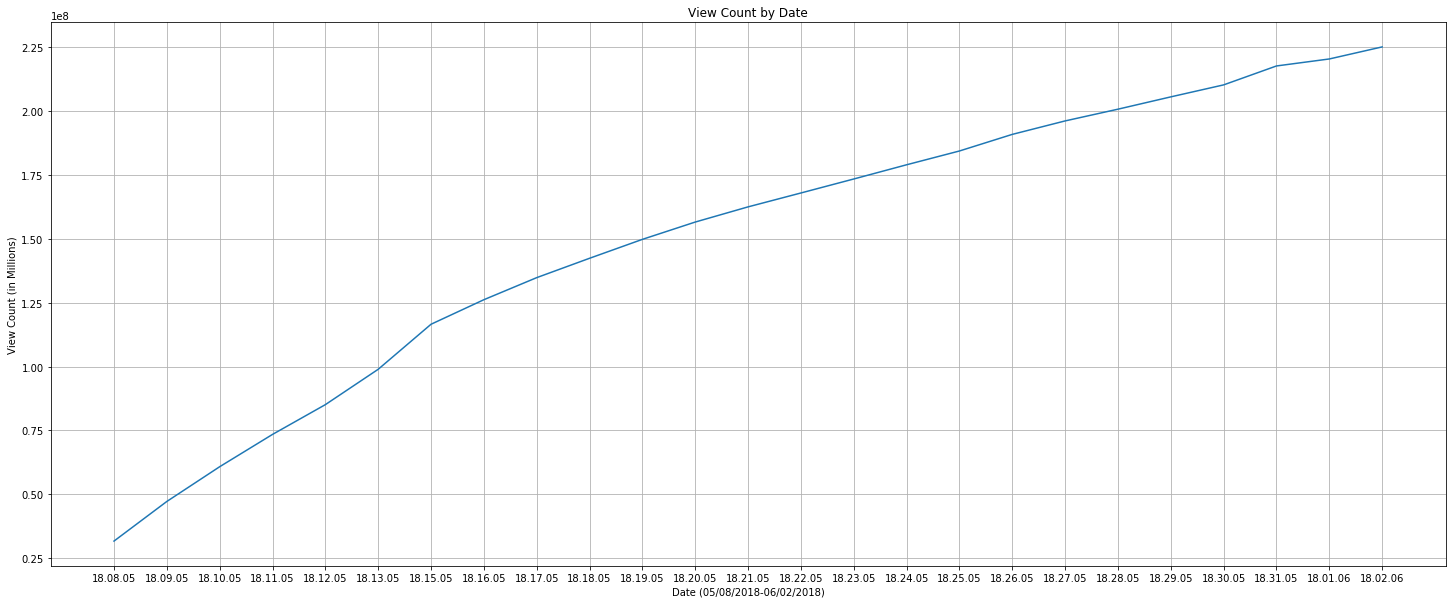

In [9]:
# Create a scatterplot showing the change in view count over the course of a month
viewcount = masterdf['views']
trending_date_views = pctviews['trending_date']

plt.figure(figsize=(25,10))
#plt.ylim(0,250000000)
viewcount_plot = plt.plot(trending_date_views,viewcount)
viewcount_plot

plt.title("View Count by Date")
plt.ylabel("View Count (in Millions)")
plt.xlabel("Date (05/08/2018-06/02/2018)")
plt.grid(True)

plt.savefig("Figures/viewcount_plot.png")

plt.show()

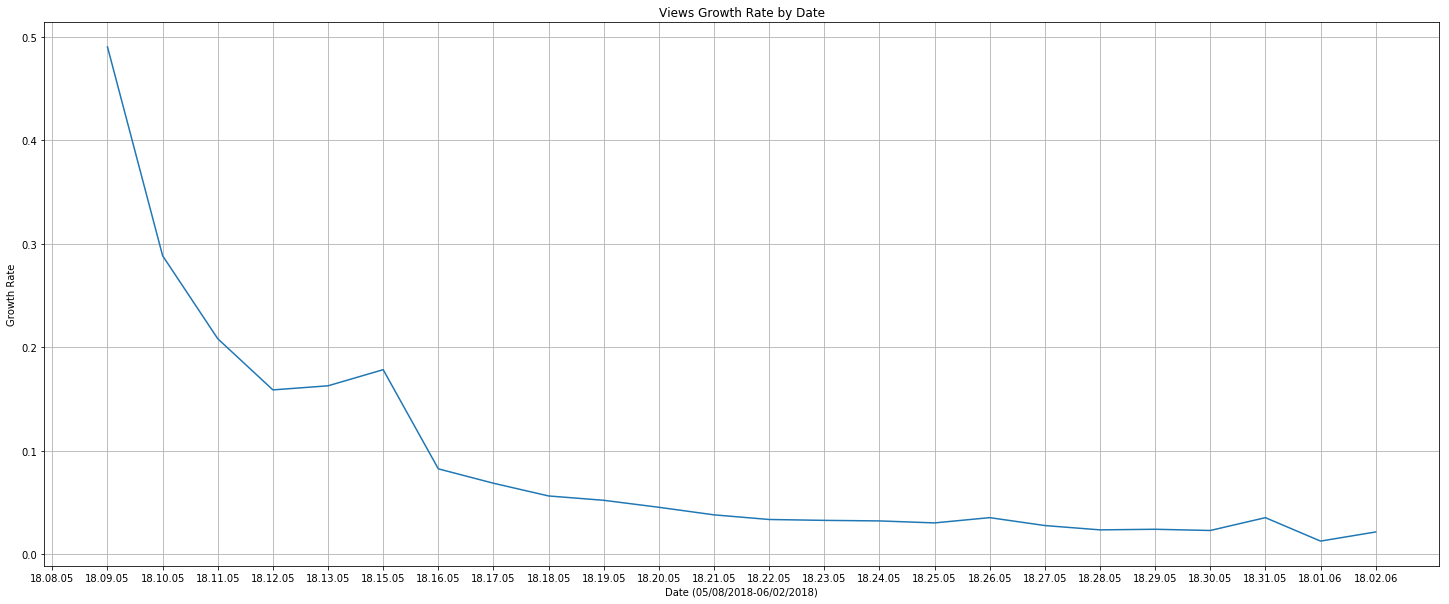

In [10]:
# Create a scatterplot showing the growthrate of views through the course of a month
growth_rate_views = pctviews['growth_rate']
trending_date_grv = pctviews['trending_date']

plt.figure(figsize=(25,10))
views_plot = plt.plot(trending_date_grv,growth_rate_views)
views_plot

plt.title("Views Growth Rate by Date")
plt.ylabel("Growth Rate")
plt.xlabel("Date (05/08/2018-06/02/2018)")
plt.grid(True)

plt.savefig("Figures/viewsgrowthrate.png")

plt.show()

In [11]:
likes_count = masterdf[['likes']]
likes_count['trending_date'] = masterdf['trending_date']
likes_count.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,likes,trending_date
36301,1405355,18.08.05
36100,1841540,18.09.05
35878,2183732,18.10.05
35675,2478904,18.11.05
35474,2735961,18.12.05


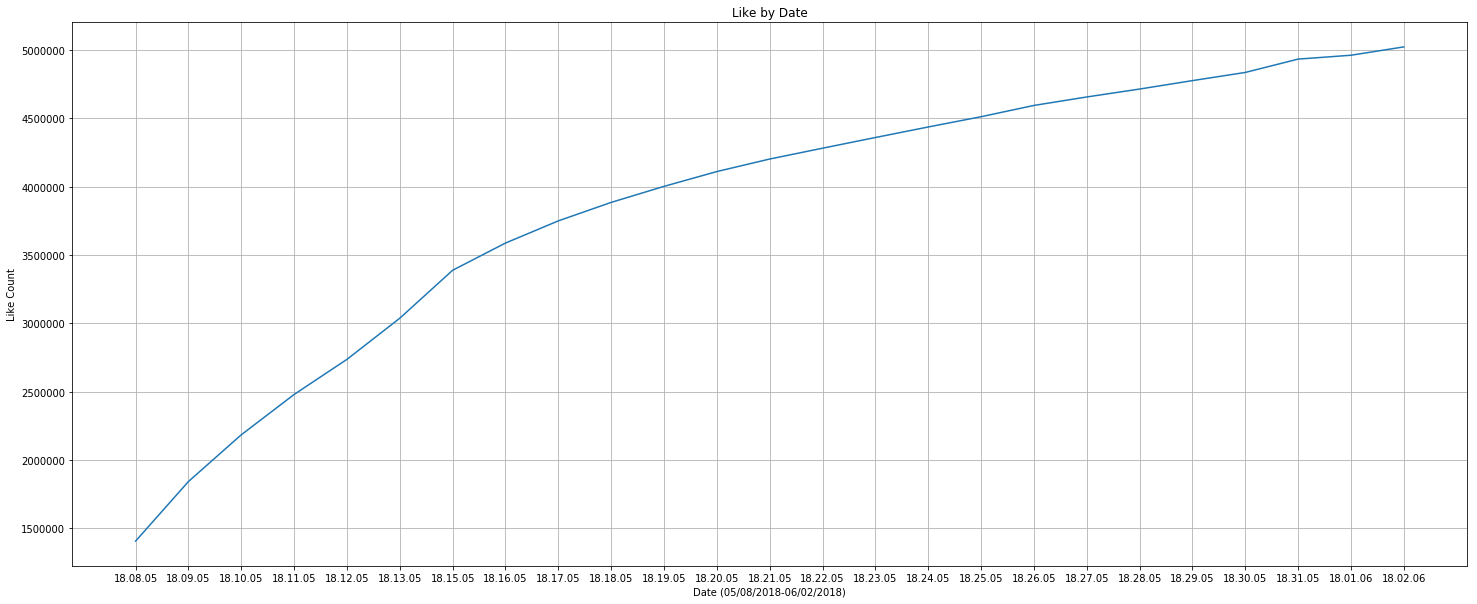

In [12]:
likes_graph = likes_count['likes']
likes_by_date = likes_count['trending_date']

plt.figure(figsize=(25,10))
#plt.ylim(0,5500000)
likescount_plot = plt.plot(likes_by_date,likes_graph)
likescount_plot

plt.title("Like by Date")
plt.ylabel("Like Count")
plt.xlabel("Date (05/08/2018-06/02/2018)")
plt.grid(True)

plt.savefig("Figures/likecount_plot.png")

plt.show()

In [13]:
# change the format of views into growth rate
pctlikes = likes_count[['likes']].pct_change()
pctlikes.rename(columns={'likes' : 'growth_rate'}, inplace=True)
pctlikes.head()

,growth_rate
36301,NaN
36100,0.310374
35878,0.185818
35675,0.135169
35474,0.103698


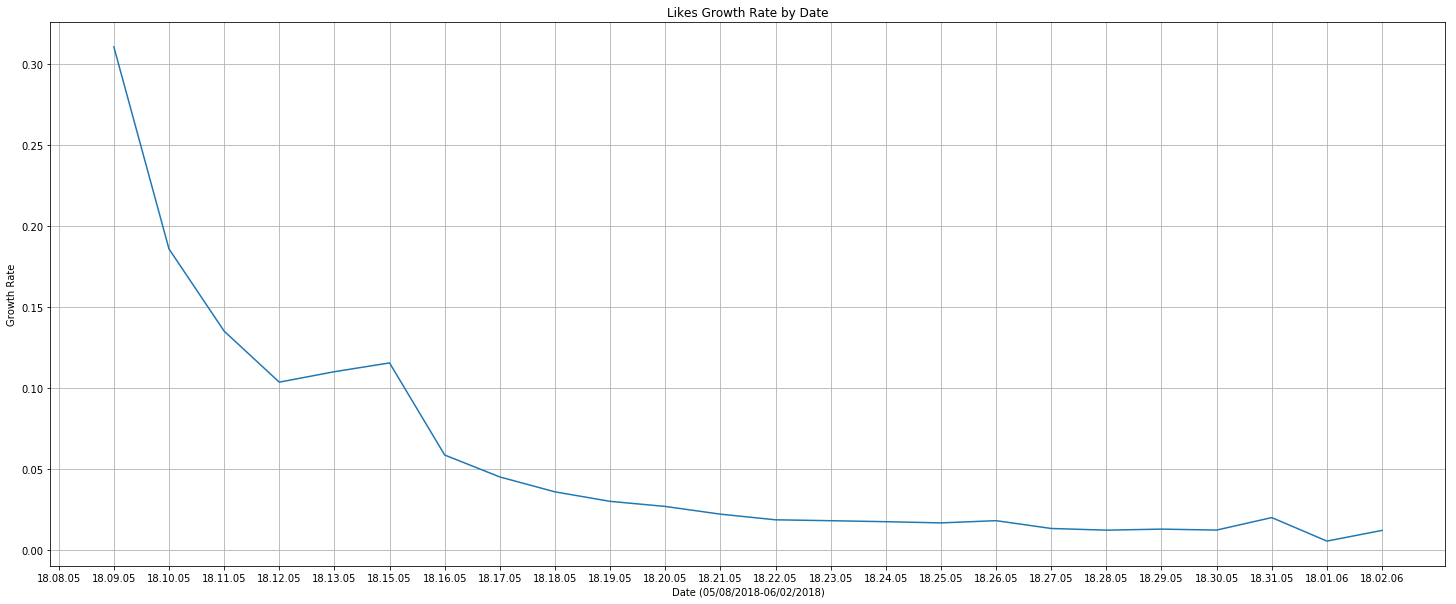

In [14]:
# Plotting the DataFrame
growth_rate_likes = pctlikes['growth_rate']
trending_date_likes = likes_count['trending_date']

plt.figure(figsize=(25,10))
likes_plot = plt.plot(trending_date_likes,growth_rate_likes)
likes_plot

plt.title("Likes Growth Rate by Date")
plt.ylabel("Growth Rate")
plt.xlabel("Date (05/08/2018-06/02/2018)")
plt.grid(True)

plt.savefig("Figures/likesgrowthrate.png")

plt.show()

In [15]:
dislikes_count = masterdf[['dislikes']]
dislikes_count['trending_date'] = masterdf[['trending_date']]
dislikes_count.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,dislikes,trending_date
36301,51547,18.08.05
36100,79717,18.09.05
35878,104377,18.10.05
35675,124290,18.11.05
35474,140711,18.12.05


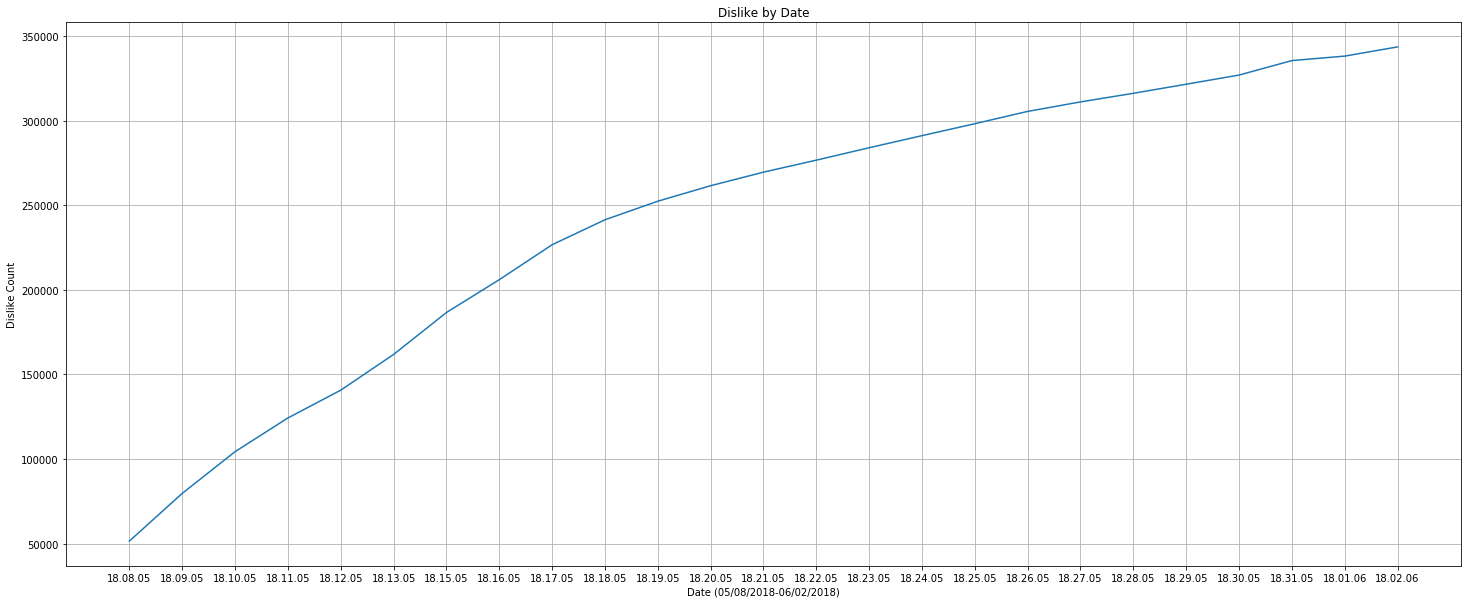

In [16]:
dislikes_graph = dislikes_count['dislikes']
dislikes_by_date = dislikes_count['trending_date']

plt.figure(figsize=(25,10))
#plt.ylim(0,5500000)
dislikescount_plot = plt.plot(dislikes_by_date,dislikes_graph)
dislikescount_plot

plt.title("Dislike by Date")
plt.ylabel("Dislike Count")
plt.xlabel("Date (05/08/2018-06/02/2018)")
plt.grid(True)

plt.savefig("Figures/dislikecount_plot.png")

plt.show()

In [17]:
# change the format of views into growth rate
pctdislikes = dislikes_count[['dislikes']].pct_change()
pctdislikes.rename(columns={'dislikes' : 'growth_rate'}, inplace=True)
pctdislikes.head()

,growth_rate
36301,NaN
36100,0.546492
35878,0.309344
35675,0.190780
35474,0.132118


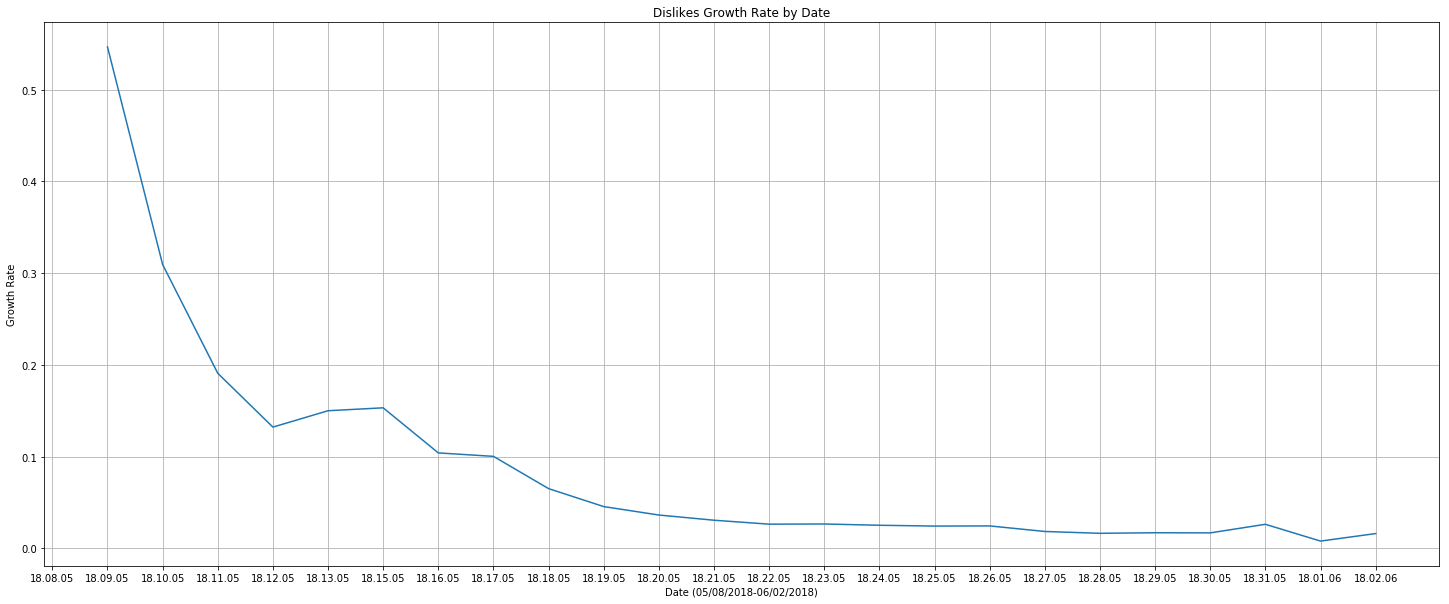

In [18]:
# Plotting the DataFrame
growth_rate_dislikes = pctdislikes['growth_rate']
trending_date_dislikes = dislikes_count['trending_date']

plt.figure(figsize=(25,10))
dislikes_plot = plt.plot(trending_date_dislikes,growth_rate_dislikes)
dislikes_plot

plt.title("Dislikes Growth Rate by Date")
plt.ylabel("Growth Rate")
plt.xlabel("Date (05/08/2018-06/02/2018)")
plt.grid(True)

plt.savefig("Figures/dislikesgrowthrate.png")

plt.show()

In [19]:
comment_count = masterdf[['comment_count']]
comment_count['trending_date'] = masterdf['trending_date']
comment_count.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,comment_count,trending_date
36301,149473,18.08.05
36100,194822,18.09.05
35878,232723,18.10.05
35675,263984,18.11.05
35474,289682,18.12.05


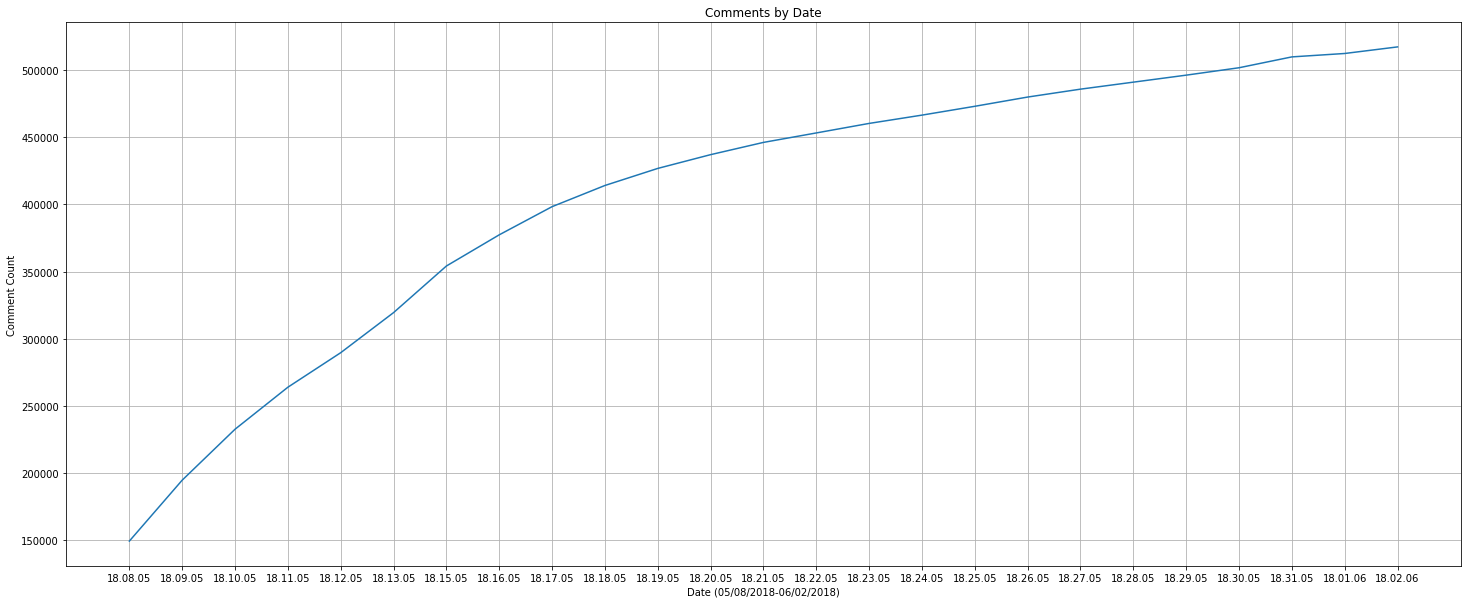

In [20]:
comment_graph = comment_count['comment_count']
comment_graph_by_date = comment_count['trending_date']

plt.figure(figsize=(25,10))
#plt.ylim(0,5500000)
comment_plot = plt.plot(comment_graph_by_date,comment_graph)
comment_plot

plt.title("Comments by Date")
plt.ylabel("Comment Count")
plt.xlabel("Date (05/08/2018-06/02/2018)")
plt.grid(True)

plt.savefig("Figures/commentcount_plot.png")

plt.show()

In [21]:
# change the format of views into growth rate
pctcomments = comment_count[['comment_count']].pct_change()
pctcomments.rename(columns={'comment_count' : 'growth_rate'}, inplace=True)
pctcomments.head()

,growth_rate
36301,NaN
36100,0.303393
35878,0.194542
35675,0.134327
35474,0.097347


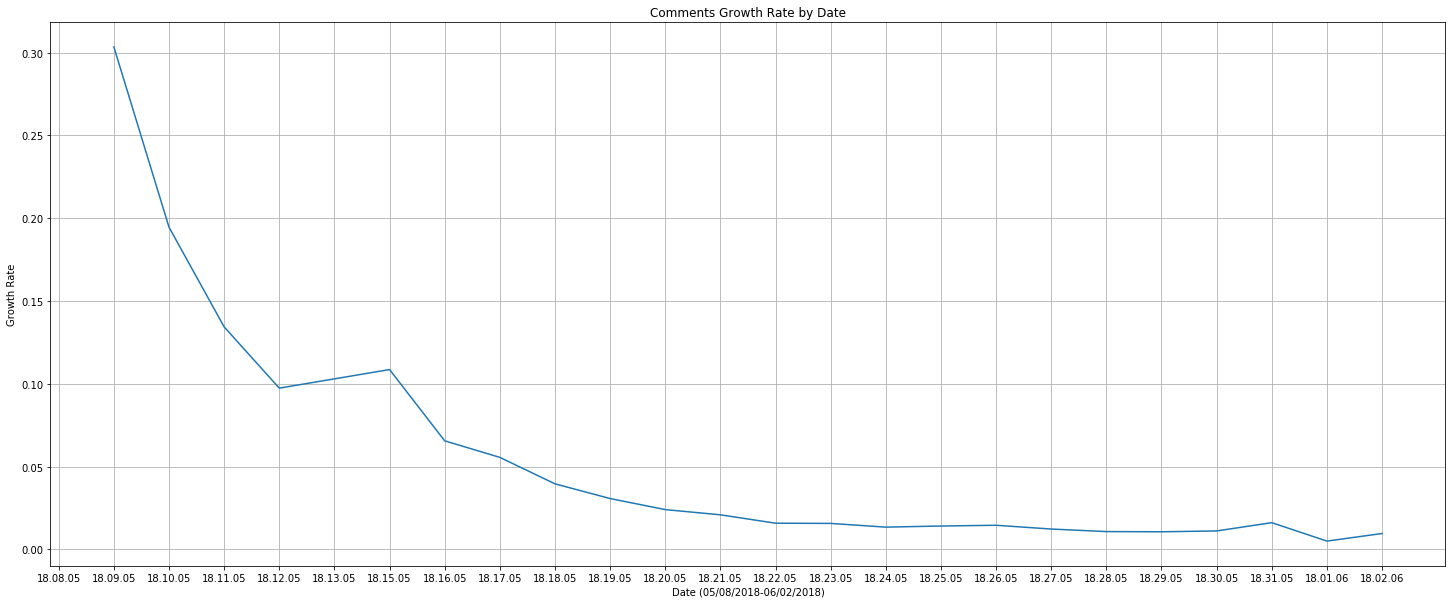

In [22]:
# Plotting the DataFrame
growth_rate_comments = pctcomments['growth_rate']
trending_date_comments = comment_count['trending_date']

plt.figure(figsize=(25,10))
comment_plot = plt.plot(trending_date_comments,growth_rate_comments)
comment_plot

plt.title("Comments Growth Rate by Date")
plt.ylabel("Growth Rate")
plt.xlabel("Date (05/08/2018-06/02/2018)")
plt.grid(True)

plt.savefig("Figures/commentsgrowthrate.png")

plt.show()

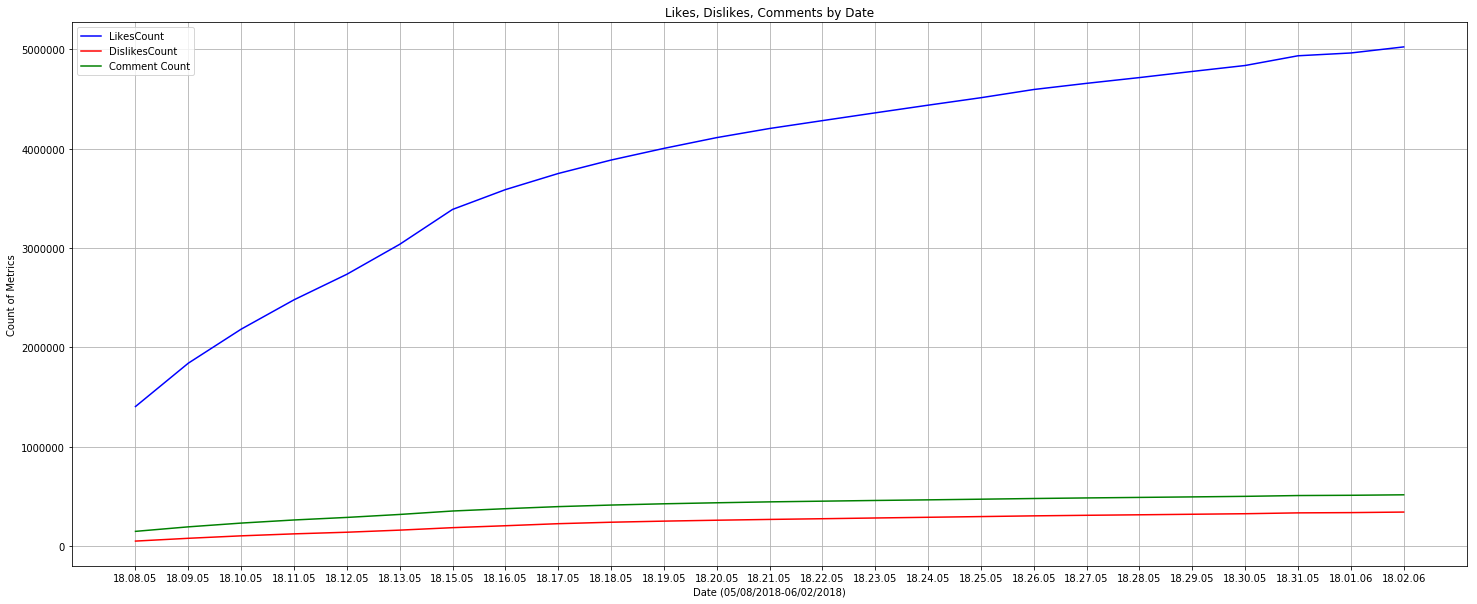

In [23]:
# Create a scaterplot involving likes, comments, and dislikes throughout the course of a month
plt.figure(figsize=(25,10))
plt.plot(likes_by_date, likes_graph, 'b-', label='LikesCount')
plt.plot(dislikes_by_date, dislikes_graph, 'r-', label='DislikesCount')
plt.plot(comment_graph_by_date, comment_graph, 'g-', label='Comment Count')

plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Date (05/08/2018-06/02/2018)')
plt.ylabel('Count of Metrics')
plt.title('Likes, Dislikes, Comments by Date')

plt.savefig("Figures/countcomparison.png")
plt.savefig("DataPlots/countcomparison.png")

plt.show()

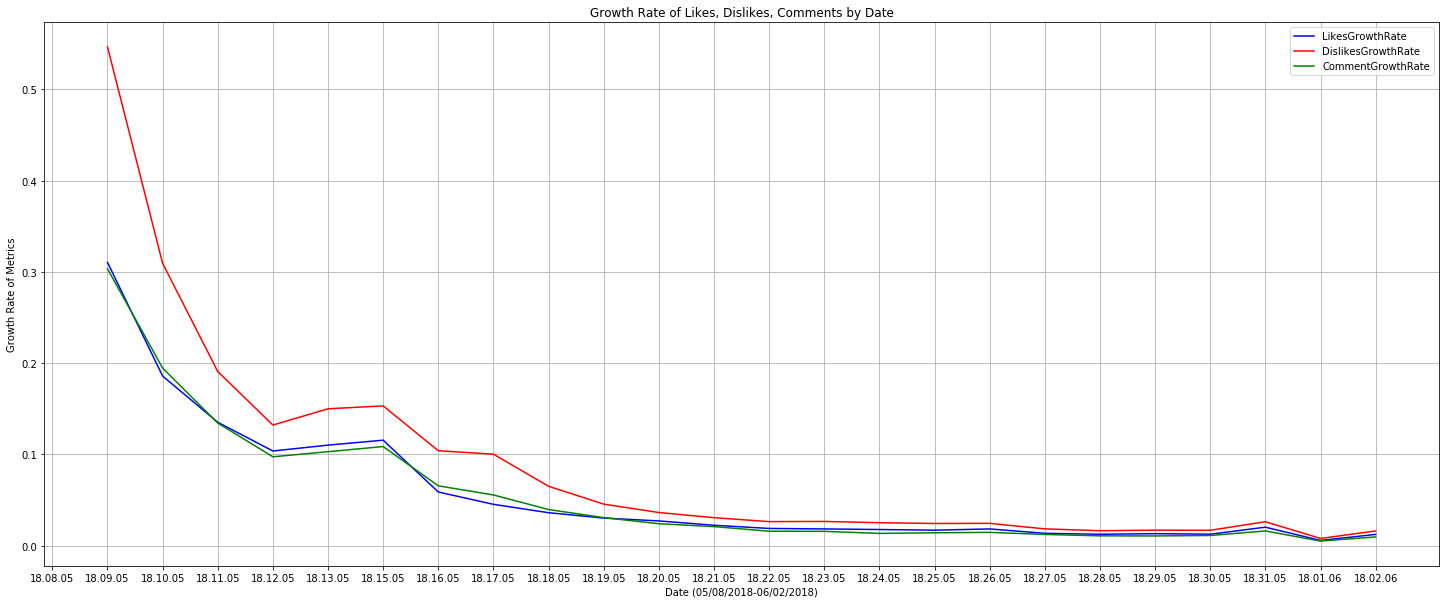

In [24]:
# Create a scatterplot involving growthrate of likes, comments, and dislikes throughout the course of a month
plt.figure(figsize=(25,10))
plt.plot(trending_date_likes, growth_rate_likes, 'b-', label='LikesGrowthRate')
plt.plot(trending_date_dislikes, growth_rate_dislikes, 'r-', label='DislikesGrowthRate')
plt.plot(trending_date_comments, growth_rate_comments, 'g-', label='CommentGrowthRate')

plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Date (05/08/2018-06/02/2018)')
plt.ylabel('Growth Rate of Metrics')
plt.title('Growth Rate of Likes, Dislikes, Comments by Date')

plt.savefig("Figures/growthratecomparison.png")
plt.savefig("DataPlots/growthratecomparison.png")

plt.show()